<a href="https://colab.research.google.com/github/FaizalLeviansyah/Machine_Learning-2023/blob/main/GROUP_2_QUIZ_2_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models


11490434/11490434 [==============================] - 0s 0us/step


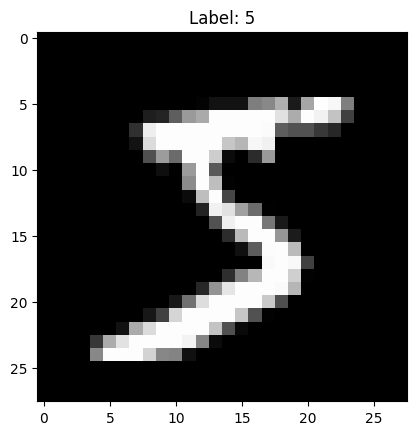

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Display a sample image
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [ ]:
digits_data = np.vstack([train_images, test_images])
digits_labels = np.hstack([train_labels, test_labels])



In [ ]:
digits_data.shape

(70000, 28, 28)

In [ ]:
# Check label shape
digits_labels.shape

(70000,)

<Axes: xlabel='Labels', ylabel='count'>

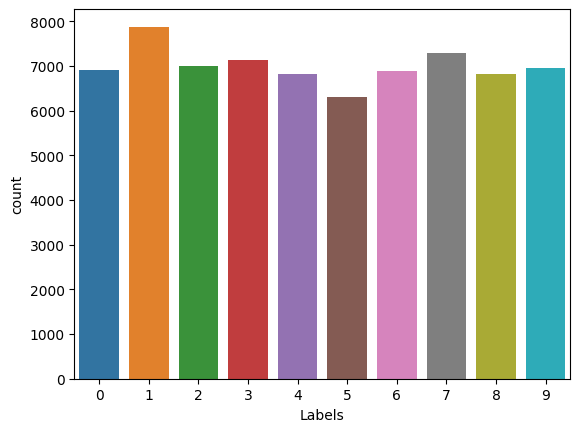

In [ ]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip


--2023-12-08 04:12:20--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  56.2MB/s    in 3.4s    

2023-12-08 04:12:24 (53.7 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()


In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

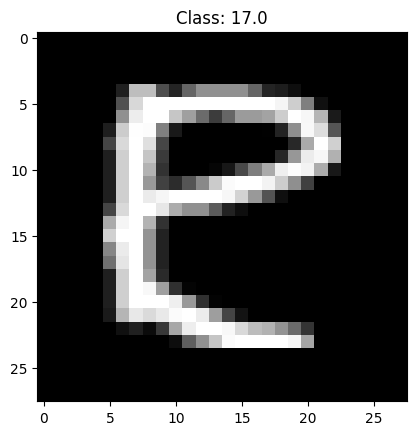

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));


<Axes: xlabel='Labels', ylabel='count'>

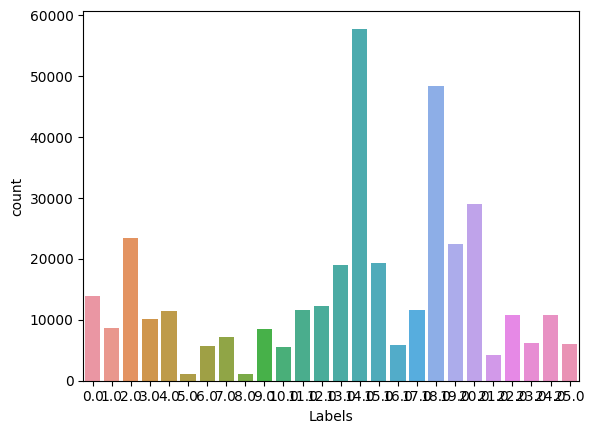

In [ ]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:

# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10


In [ ]:

# check alphabet labels again
np.unique(alphabet_labels)


array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:

# Convert data to float32
data = np.array(data, dtype = 'float32')


In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

In [ ]:
# Normalize data
data /= 255.0


In [ ]:

# Check range value of data
data[0].min(), data[0].max()


(0.0, 1.0)

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)


In [ ]:
# Check labels shape
labels.shape


(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

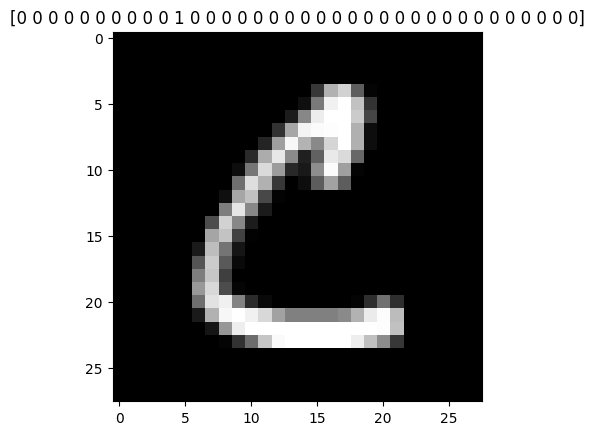

In [ ]:

# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()


57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)


In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

model.add(Dense(36, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
# Check network summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128


In [ ]:
# Setup checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = model.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.5129 - accuracy: 0.8048
Epoch 1: val_loss improved from inf to 0.24656, saving model to custom_ocr.model
2765/2765 [==============================] - 137s 46ms/step - loss: 2.5124 - accuracy: 0.8049 - val_loss: 0.2466 - val_accuracy: 0.9035
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0099 - accuracy: 0.8988
Epoch 2: val_loss improved from 0.24656 to 0.19983, saving model to custom_ocr.model
2765/2765 [==============================] - 121s 44ms/step - loss: 1.0099 - accuracy: 0.8988 - val_loss: 0.1998 - val_accuracy: 0.9240
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8479 - accuracy: 0.9115
Epoch 3: val_loss improved from 0.19983 to 0.18872, saving model to custom_ocr.model
2765/2765 [==============================] - 116s 42ms/step - loss: 0.8479 - accuracy: 0.9115 - val_loss: 0.1887 - val_accuracy: 0.9231
Epoch 4/20
2764/2765 [=========================

In [ ]:
# make a prediction
predictions = model.predict(X_test, batch_size=batch_size)


692/692 [==============================] - 4s 6ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]


array([2.5477851e-34, 9.7264473e-23, 8.4517457e-22, 8.7061992e-31,
       1.2271754e-31, 1.9750082e-30, 2.8414170e-32, 1.2969213e-25,
       0.0000000e+00, 3.9746048e-29, 4.3029530e-29, 0.0000000e+00,
       1.0629730e-22, 7.9431674e-21, 1.3426438e-28, 0.0000000e+00,
       1.3385151e-38, 2.1236676e-35, 1.0000000e+00, 1.8772728e-11,
       2.2562214e-35, 2.4184587e-20, 3.2329757e-26, 4.8606505e-24,
       1.8472084e-20, 6.5303778e-30, 3.0873895e-32, 1.5408812e-29,
       1.5375106e-22, 2.0245220e-15, 3.1493216e-21, 7.6080982e-37,
       2.3624769e-30, 1.2972112e-28, 1.1814989e-27, 1.4953800e-18],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [ ]:
# Check label for 24
name_labels[18]

'I'

In [ ]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[1])


18

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

Make an evaluation on data

In [ ]:
# Evaluate on test data
model.evaluate(X_test, y_test)

2766/2766 [==============================] - 13s 5ms/step - loss: 0.2252 - accuracy: 0.9529


[0.22519877552986145, 0.9529099464416504]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.42      0.67      0.52      1381
           1       0.95      0.99      0.97      1575
           2       0.93      0.94      0.93      1398
           3       0.97      0.98      0.97      1428
           4       0.91      0.97      0.94      1365
           5       0.92      0.79      0.85      1263
           6       0.96      0.96      0.96      1375
           7       0.95      0.98      0.97      1459
           8       0.97      0.95      0.96      1365
           9       0.98      0.96      0.97      1392
           A       0.98      0.99      0.99      2774
           B       0.96      0.99      0.97      1734
           C       0.98      0.98      0.98      4682
           D       0.87      0.96      0.91      2027
           E       0.99      0.98      0.99      2288
           F       0.95      0.97      0.96       233
           G       0.95      0.94      0.94      1152
           H       0.97    

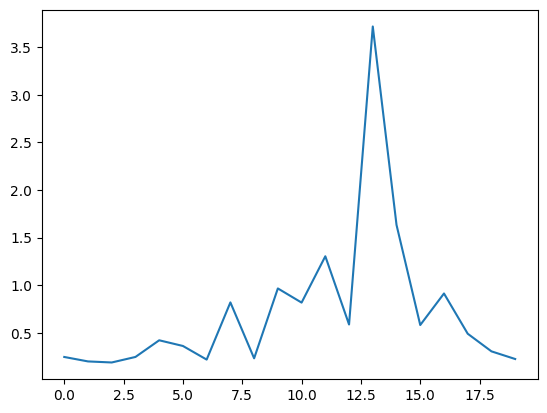

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])


In [ ]:
# You can also check the another metrics
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

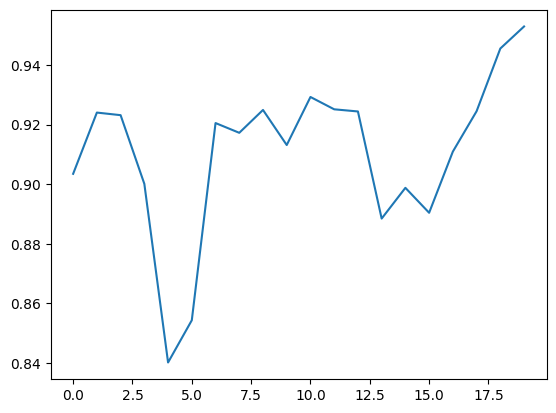

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

SAVE THE MODEL

In [ ]:
#The result will show in colab directory
model.save('network', save_format= 'h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
